In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = np.loadtxt("features.small.train")
test = np.loadtxt("features.small.test")

X_train = train[:,1:3]
Y_train = train[:,0]

X_test = test[:,1:3]
Y_test = test[:,0]

# 1.  Multiclass k-nearest neighbor classifier.

In [19]:
def knn(x_test, X_train, Y_train, k):
    distance_array = np.zeros((len(X_train),2))
    vote_array = np.zeros((10,2))
    for i,point in enumerate(X_train): #find the distance from each point to our target point
        distance_array[i] = i,np.linalg.norm(x_test[1] - point)
    sorted_distance_array = np.argsort(distance_array[:,1]) #sort the distances to get the closest distances
    best_indices = sorted_distance_array[0:k] #take k closest points
    for index in best_indices:
        label = int(Y_train[int(index)])
        vote_array[label,1] = vote_array[label,1] + 1 #tally "the vote" based on label
    return np.argmax(vote_array,axis=0)[1] #get the most tallied label by counting the vote count per column.



### a. Report the prediction error (% of correct predictions) on the validation set for k=1,11,21,31 and plot them as well as the true labels for each k.

In [4]:
def get_labels_knn(X_test,X_train,Y_train,k):
    labels = []
    for test_point in enumerate(X_test):
        labels.append(knn(test_point, X_train, Y_train, k))
    return labels

def get_error(labels, Y):
    correct_label = 0
    for i, label in enumerate(labels):
        if label == int(Y[i]):
            correct_label += 1
    return correct_label / len(labels)


The code below has been modified from the [matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html) website.

In [17]:
def plot_knn(X_test, y_labels,k,true_labels_bool, err):
    fig, ax = plt.subplots(figsize=(15,5))

    scatter = ax.scatter(X_test[:,0],X_test[:,1],marker=".",c=y_labels)

    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    ax.add_artist(legend)
    if true_labels_bool == 1:
        title = "True labels with K = %d" % k
    else:
        title = "KNN labels with K = %d. Error = %0.3f" % (k,err)
    ax.set_title(title)


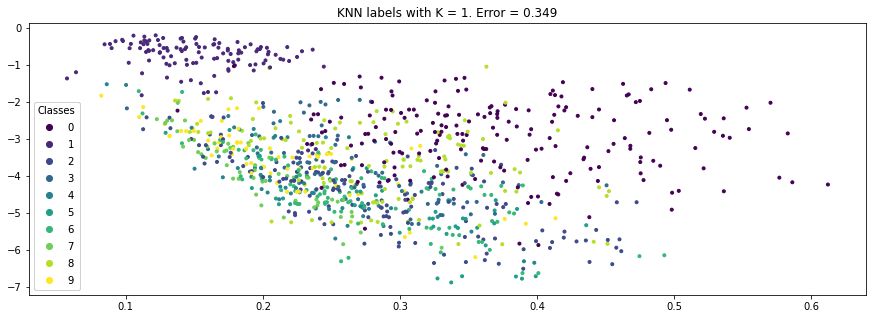

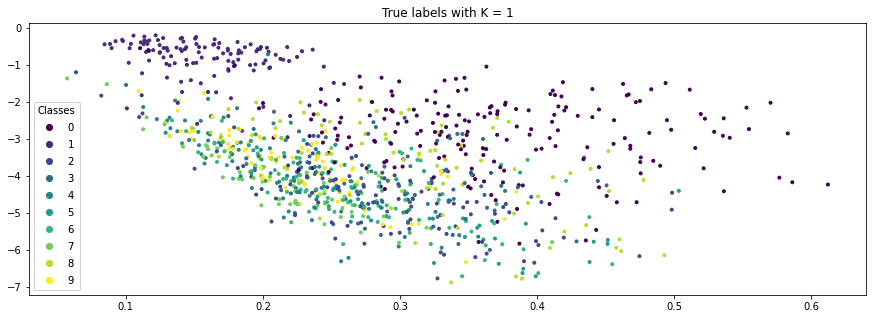

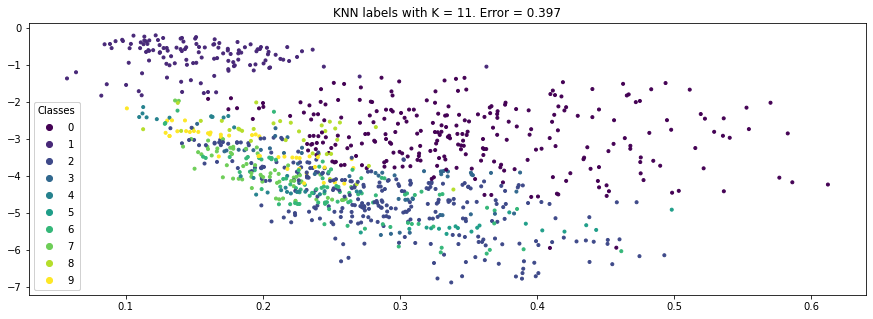

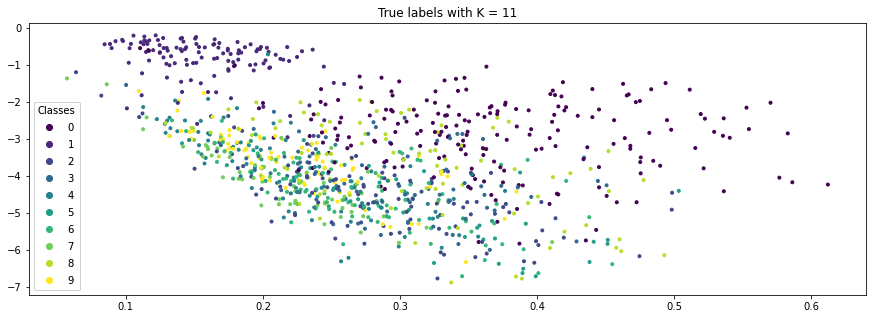

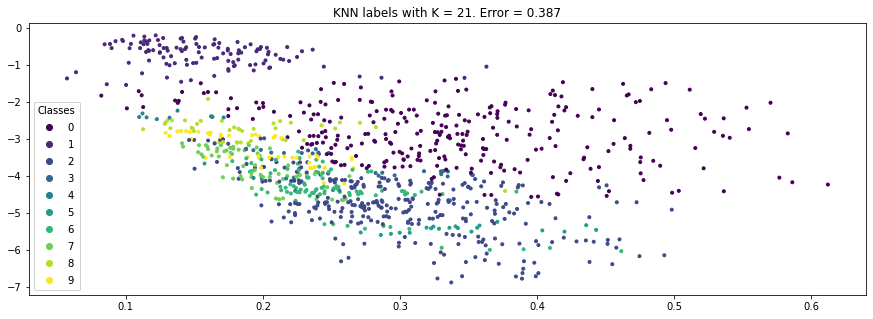

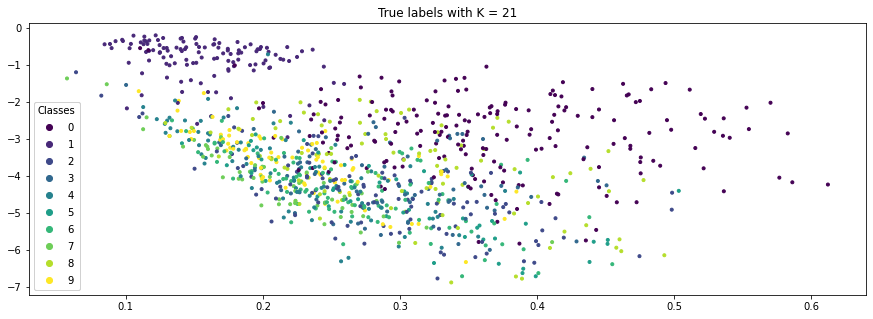

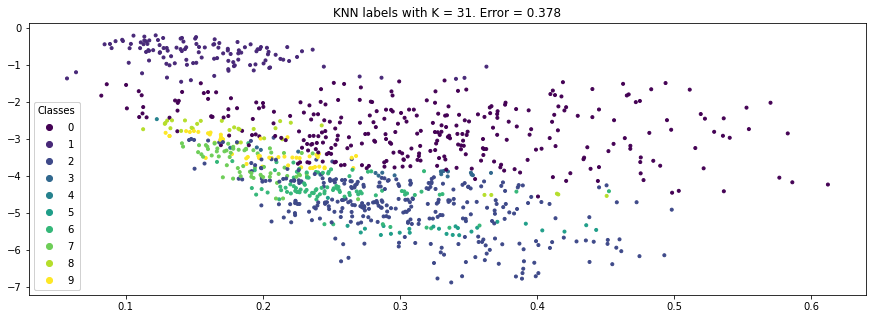

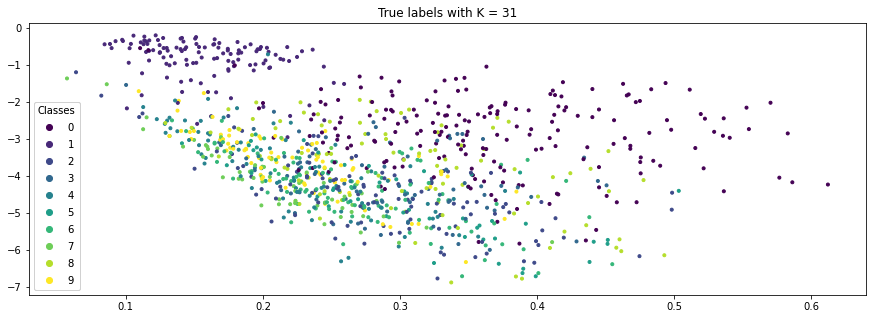

In [18]:
k_vals = [1,11,21,31]

for val in k_vals:
    labels = get_labels_knn(X_test,X_train,Y_train,val)
    knn_err = get_error(labels, Y_test)

    plot_knn(X_test, labels, val, 0,knn_err)
    plot_knn(X_test, Y_test, val, 1,knn_err)


___

# 2. Multiclass RBF classifier.  


In [7]:
def phi(val):
    return np.exp(-0.5 * (val**2))

In [8]:
def rbf(x_test, X_train, Y_train, r):
    distance_array = np.zeros((len(X_train),2))
    vote_array = np.zeros((10,2))
    for i,point in enumerate(X_train): #find the weighted distance from each point to our target point
        alpha = phi((np.linalg.norm(x_test[1]-point)) / r)
        distance_array[i] = i,alpha

    for index in range(len(X_train)):
        label = int(Y_train[int(index)])
        vote_array[label,1] = vote_array[label,1] + distance_array[index][1] #tally "the vote" based on label
    return np.argmax(vote_array,axis=0)[1] #get the most tallied label by counting the vote count per column.


### a. Report the prediction error (% of correct predictions) on the validation set for r =  [0.01, 0.05, 0.1, 0.5, 1] as well as plot the test labels and true labels for each r. 

In [9]:
def get_labels_rbf(X_test,X_train,Y_train,r):
    labels = []
    for test_point in enumerate(X_test):
        labels.append(rbf(test_point, X_train, Y_train, r))
    return labels

In [10]:
def plot_rbf(X_test, y_labels,k,true_labels_bool, err):
    fig, ax = plt.subplots(figsize=(15,5))

    scatter = ax.scatter(X_test[:,0],X_test[:,1],marker=".",c=y_labels)

    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    ax.add_artist(legend)
    if true_labels_bool == 1:
        title = "True labels with r = %0.2f" % k
    else:
        title = "RBF labels with r = %0.2f. Error = %0.3f" % (k,err)
    ax.set_title(title)

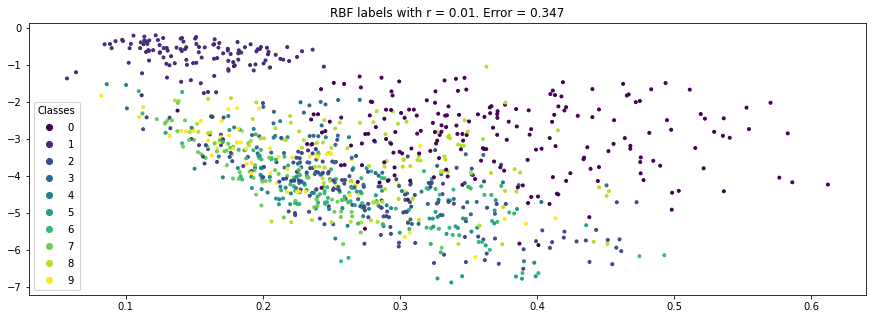

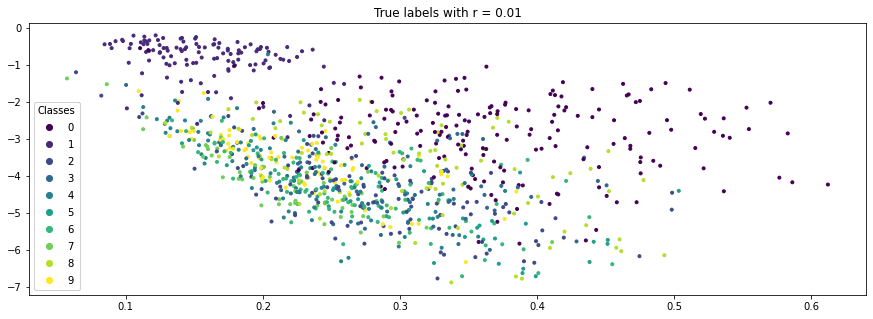

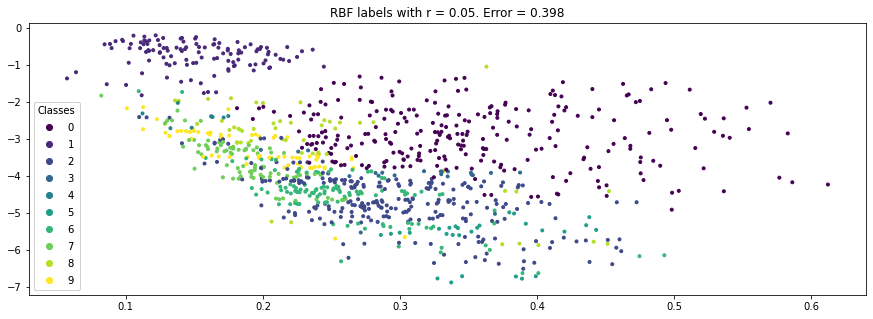

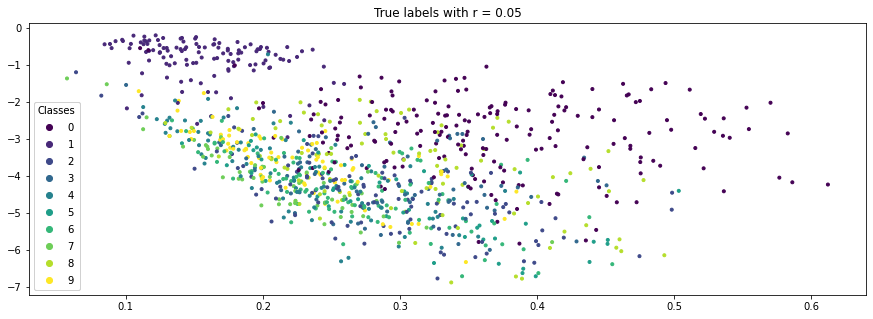

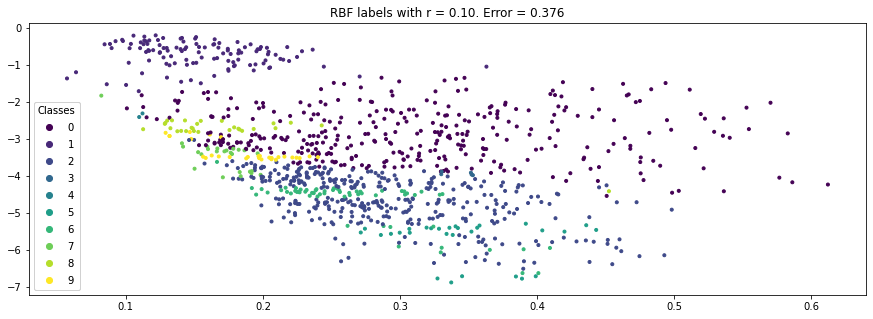

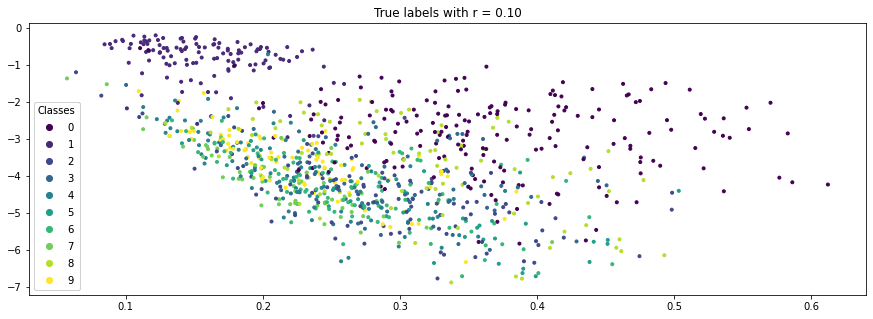

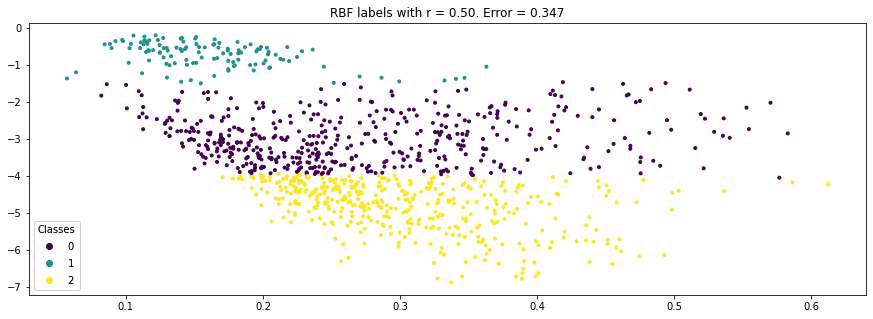

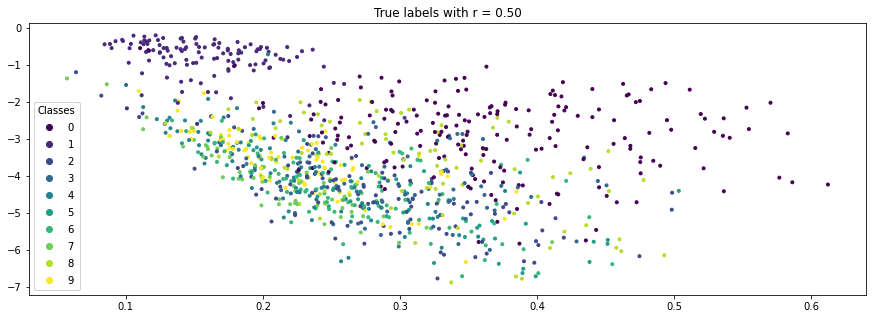

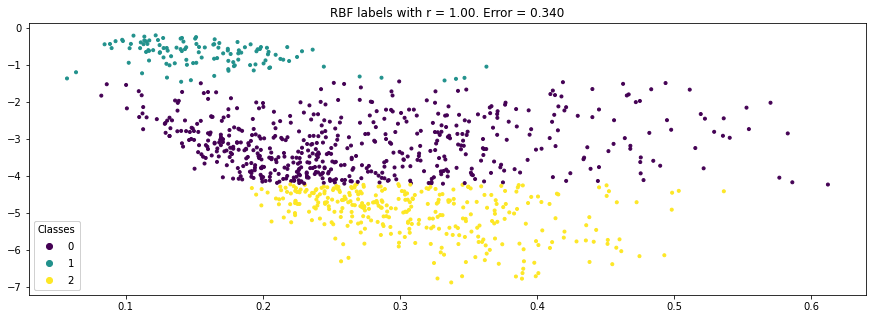

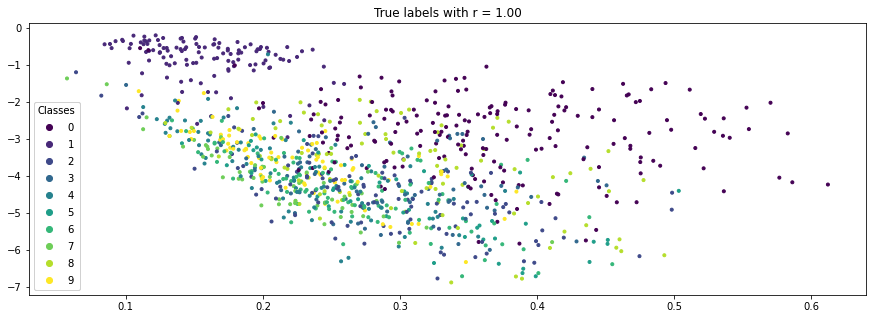

In [11]:
r_vals = [0.01,0.05,0.1,0.5,1]

for val in r_vals:
    labels = get_labels_rbf(X_test,X_train,Y_train,val)
    rbf_err = get_error(labels, Y_test)

    plot_rbf(X_test, labels, val, 0,rbf_err)
    plot_rbf(X_test, Y_test, val, 1,rbf_err)
